In [1]:
# Run this cell to import all the Python packages and formatting that we need
from datascience import *
import numpy as np
import math
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Visualizations and Row Filtering Demo

***Created by Andrew Chen (andrew_chen04@berkeley.edu)***

## Table of Contents
1. A Review of Previous Table / Array / Visualization Methods
2. The `take` Method
3. The `relabeled` Method
4. The `where` Method

## Top Movies Data

In [2]:
# Top movies table
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


# 1. A Review of Previous Table / Array / Visualization Methods

In [3]:
# Find the ratio of Gross (Adjusted) to Gross
ratio = top_movies.column('Gross (Adjusted)') / top_movies.column('Gross')
ratio

array([ 9.04071227,  3.43490249,  7.97921336,  2.89830938,  1.82847828,
       17.78      ,  4.37931038,  9.87777778,  4.22155714,  5.24000245,
        1.0261364 ,  6.13103475,  3.0048221 , 11.77324324,  1.13750615,
        2.70343195,  2.03050893,  1.69188348,  1.8745083 ,  5.08      ,
        3.17135393,  7.24928095,  9.6620192 ,  1.07738625,  5.19849046,
        2.11621342,  6.79591148,  3.62508913,  1.09643912, 10.45624844,
        1.23767421,  4.61786323, 12.52112597,  2.61231145,  1.43156194,
        6.13103423,  5.84868382,  1.5301205 ,  2.0113067 ,  2.10720318,
        7.11199958, 10.33720958,  2.54286286, 11.53865987,  5.8486841 ,
        5.08      , 16.16363611,  1.35725192, 13.67692381,  5.53955489,
        4.7006132 ,  2.22807037, 26.14705822,  1.45026555,  1.43761005,
        4.70370345,  1.00967474,  5.75556245,  1.43156208, 14.81666667,
        7.40833333,  3.76006003,  1.43150064,  1.38689536,  2.49257344,
        1.49810467,  1.1422844 ,  1.74401168,  3.79914491,  2.85

In [4]:
# Create a copy to the top_movies table with the ratio as a new column
top_movies_with_ratio = top_movies.with_column('Ratio', ratio)
top_movies_with_ratio

Title,Studio,Gross,Gross (Adjusted),Year,Ratio
Gone with the Wind,MGM,198676459,1796176700,1939,9.04071
Star Wars,Fox,460998007,1583483200,1977,3.4349
The Sound of Music,Fox,158671368,1266072700,1965,7.97921
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,2.89831
Titanic,Paramount,658672302,1204368000,1997,1.82848
The Ten Commandments,Paramount,65500000,1164590000,1956,17.78
Jaws,Universal,260000000,1138620700,1975,4.37931
Doctor Zhivago,MGM,111721910,1103564200,1965,9.87778
The Exorcist,Warner Brothers,232906145,983226600,1973,4.22156
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,5.24


In [5]:
# Rearrange the columns around (keeping the same variable name)
top_movies_with_ratio = top_movies_with_ratio.select('Year', 'Title', 'Studio',
                                                     'Gross', 'Gross (Adjusted)', 'Ratio')
top_movies_with_ratio

Year,Title,Studio,Gross,Gross (Adjusted),Ratio
1939,Gone with the Wind,MGM,198676459,1796176700,9.04071
1977,Star Wars,Fox,460998007,1583483200,3.4349
1965,The Sound of Music,Fox,158671368,1266072700,7.97921
1982,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,2.89831
1997,Titanic,Paramount,658672302,1204368000,1.82848
1956,The Ten Commandments,Paramount,65500000,1164590000,17.78
1975,Jaws,Universal,260000000,1138620700,4.37931
1965,Doctor Zhivago,MGM,111721910,1103564200,9.87778
1973,The Exorcist,Warner Brothers,232906145,983226600,4.22156
1937,Snow White and the Seven Dwarves,Disney,184925486,969010000,5.24


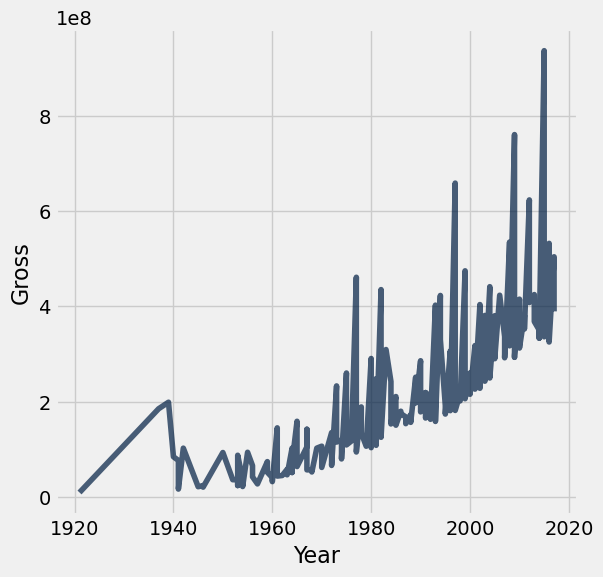

In [6]:
# Line plot with multiple Gross values per year
top_movies_with_ratio.plot('Year', 'Gross')

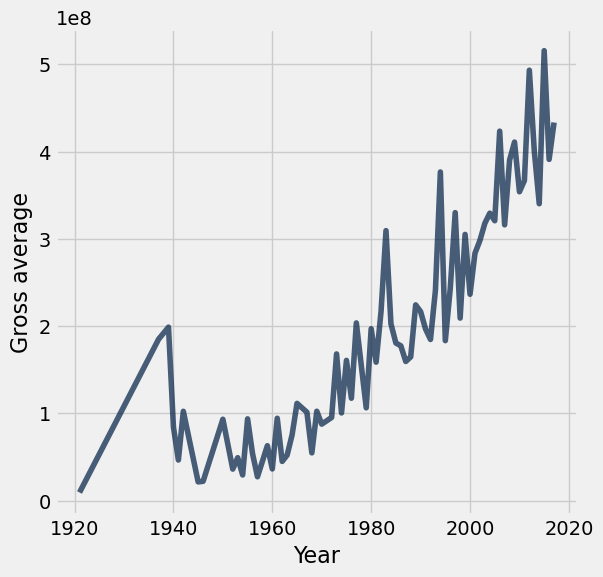

In [7]:
# Line plot with average Gross per year
average_yearly_gross = top_movies_with_ratio.select('Year', 'Gross').group('Year', np.average)
average_yearly_gross.plot('Year', 'Gross average')

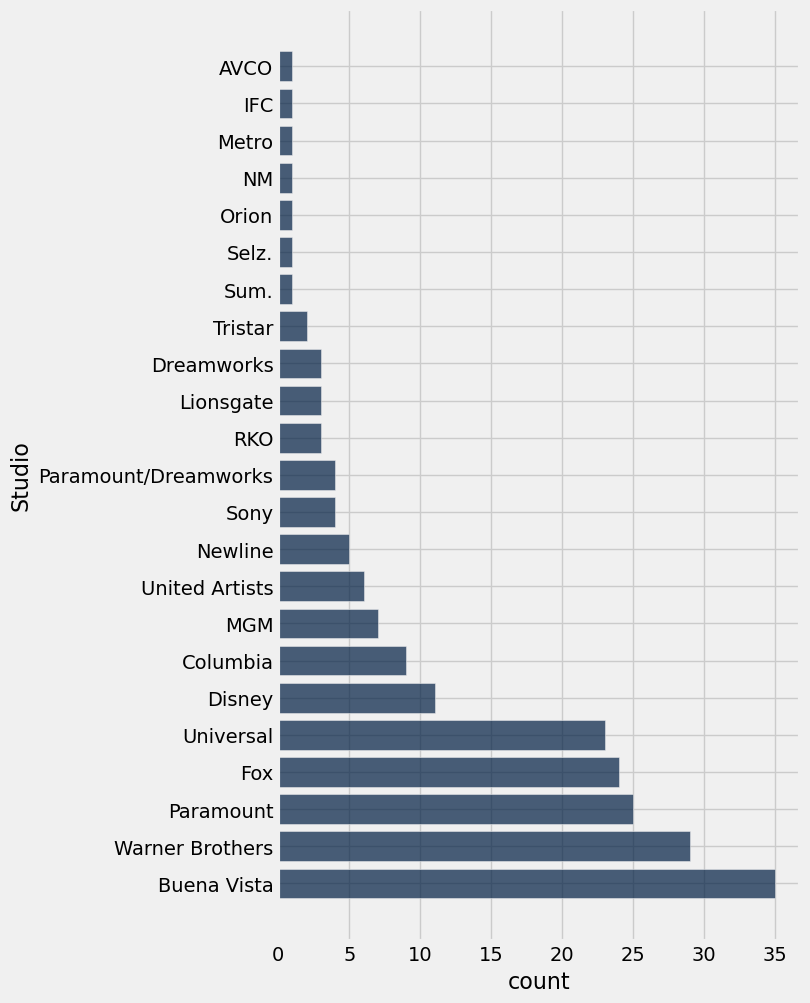

In [8]:
# Line plot with number of top movies per studio, sorted in ascending order
movies_per_studio = top_movies_with_ratio.group('Studio').sort('count')
movies_per_studio.barh('Studio', 'count')

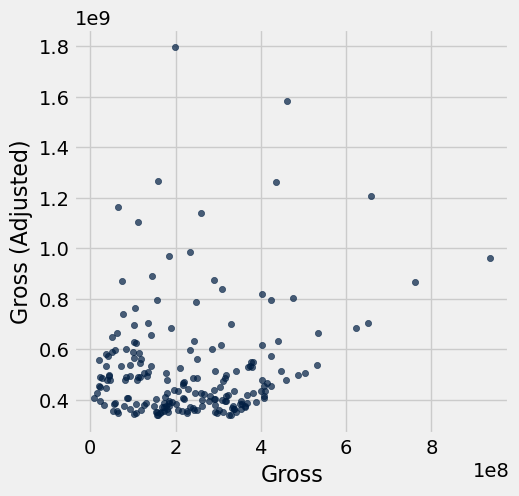

In [9]:
# Scatterplot
top_movies_with_ratio.scatter('Gross', 'Gross (Adjusted)')

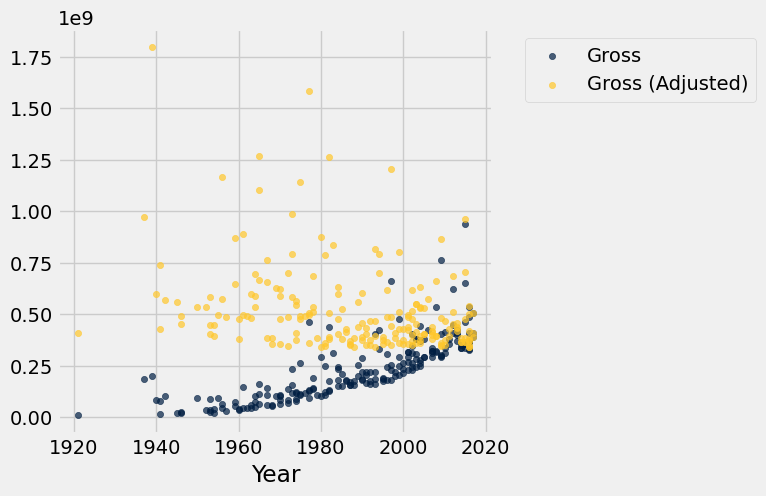

In [10]:
# Today, we'll be using the overlay argument in .scatter, which requires 
# multiple y-axis columns; it puts everything on same plot + 
# makes each y-axis column a diff color

# As a result, the middle argument here is an array of the multiple y-axis columns you want
top_movies_with_ratio.scatter('Year', make_array('Gross', 'Gross (Adjusted)'), overlay = True)

# 2. The `take` Method

In [11]:
top_movies_with_ratio

Year,Title,Studio,Gross,Gross (Adjusted),Ratio
1939,Gone with the Wind,MGM,198676459,1796176700,9.04071
1977,Star Wars,Fox,460998007,1583483200,3.4349
1965,The Sound of Music,Fox,158671368,1266072700,7.97921
1982,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,2.89831
1997,Titanic,Paramount,658672302,1204368000,1.82848
1956,The Ten Commandments,Paramount,65500000,1164590000,17.78
1975,Jaws,Universal,260000000,1138620700,4.37931
1965,Doctor Zhivago,MGM,111721910,1103564200,9.87778
1973,The Exorcist,Warner Brothers,232906145,983226600,4.22156
1937,Snow White and the Seven Dwarves,Disney,184925486,969010000,5.24


In [12]:
# First row of the table
top_movies_with_ratio.take(0)

Year,Title,Studio,Gross,Gross (Adjusted),Ratio
1939,Gone with the Wind,MGM,198676459,1796176700,9.04071


In [13]:
# Rows 0, 37, 183, 2 of the table
rows_i_want = make_array(0, 37, 183, 2)
top_movies_with_ratio.take(rows_i_want)

Year,Title,Studio,Gross,Gross (Adjusted),Ratio
1939,Gone with the Wind,MGM,198676459,1796176700,9.04071
2002,Spider-Man,Sony,403706375,617719400,1.53012
1987,Fatal Attraction,Paramount,156645693,352761800,2.25197
1965,The Sound of Music,Fox,158671368,1266072700,7.97921


In [14]:
# Rows 0 to 6 of the table
new_rows_i_want = np.arange(start = 0, stop = 7, step = 1)
top_movies_with_ratio.take(new_rows_i_want)

Year,Title,Studio,Gross,Gross (Adjusted),Ratio
1939,Gone with the Wind,MGM,198676459,1796176700,9.04071
1977,Star Wars,Fox,460998007,1583483200,3.4349
1965,The Sound of Music,Fox,158671368,1266072700,7.97921
1982,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,2.89831
1997,Titanic,Paramount,658672302,1204368000,1.82848
1956,The Ten Commandments,Paramount,65500000,1164590000,17.78
1975,Jaws,Universal,260000000,1138620700,4.37931


In [15]:
# Rows 137 to 142 of the table
middle_rows_i_want = np.arange(start = 137, stop = 143, step = 1)
top_movies_with_ratio.take(middle_rows_i_want)

Year,Title,Studio,Gross,Gross (Adjusted),Ratio
2011,Transformers: Dark of the Moon,Paramount/Dreamworks,352390543,393479300,1.1166
2004,Meet the Fockers,Universal,279261160,392698200,1.4062
2008,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,317101119,392622400,1.23816
1995,Toy Story,Buena Vista,191796233,389989400,2.03335
2017,Guardians of the Galaxy Vol. 2,Buena Vista,389397196,389397196,1
1990,Dances with Wolves,Orion,184208848,388486700,2.10895


# 3. The `relabeled` Method

In [16]:
# Relabel Gross (Adjusted) to Adjusted (keeping the same variable name)
top_movies_with_ratio = top_movies_with_ratio.relabeled('Gross (Adjusted)', 'Adjusted')
top_movies_with_ratio

Year,Title,Studio,Gross,Adjusted,Ratio
1939,Gone with the Wind,MGM,198676459,1796176700,9.04071
1977,Star Wars,Fox,460998007,1583483200,3.4349
1965,The Sound of Music,Fox,158671368,1266072700,7.97921
1982,E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,2.89831
1997,Titanic,Paramount,658672302,1204368000,1.82848
1956,The Ten Commandments,Paramount,65500000,1164590000,17.78
1975,Jaws,Universal,260000000,1138620700,4.37931
1965,Doctor Zhivago,MGM,111721910,1103564200,9.87778
1973,The Exorcist,Warner Brothers,232906145,983226600,4.22156
1937,Snow White and the Seven Dwarves,Disney,184925486,969010000,5.24


# 4. The `where` Method

In [17]:
# Isolate Fox (string data)
# fox = top_movies_with_ratio.where('Studio', are.equal_to('Fox'))

# are.equal_to is the default predicate in .where, so it is optional
fox = top_movies_with_ratio.where('Studio', 'Fox')
fox

Year,Title,Studio,Gross,Adjusted,Ratio
1977,Star Wars,Fox,460998007,1583483200,3.4349
1965,The Sound of Music,Fox,158671368,1266072700,7.97921
1980,The Empire Strikes Back,Fox,290475067,872825900,3.00482
2009,Avatar,Fox,760507625,865082100,1.13751
1983,Return of the Jedi,Fox,309306177,836188200,2.70343
1999,Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1.69188
1969,Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,6.13103
1996,Independence Day,Fox,306169268,615800300,2.01131
1990,Home Alone,Fox,285761243,602157000,2.1072
1963,Cleopatra (1963),Fox,57777778,597261000,10.3372


In [18]:
# Identify Fox movies before or during 1999 (numerical data)
fox_1900 = fox.where('Year', are.below_or_equal_to(1999))
fox_1900

Year,Title,Studio,Gross,Adjusted,Ratio
1977,Star Wars,Fox,460998007,1583483200,3.4349
1965,The Sound of Music,Fox,158671368,1266072700,7.97921
1980,The Empire Strikes Back,Fox,290475067,872825900,3.00482
1983,Return of the Jedi,Fox,309306177,836188200,2.70343
1999,Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1.69188
1969,Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,6.13103
1996,Independence Day,Fox,306169268,615800300,2.01131
1990,Home Alone,Fox,285761243,602157000,2.1072
1963,Cleopatra (1963),Fox,57777778,597261000,10.3372
1953,The Robe,Fox,36000000,581890900,16.1636


In [19]:
# Remember that you can "chain" methods together (e.g., using .sort, then .take)
# Here, I sort these movies by year in ascending order and then take the top 4 rows
fox_1900_sorted_4 = fox_1900.sort('Year').take(np.arange(start = 0, stop = 4, step = 1))
fox_1900_sorted_4

Year,Title,Studio,Gross,Adjusted,Ratio
1953,The Robe,Fox,36000000,581890900,16.1636
1963,Cleopatra (1963),Fox,57777778,597261000,10.3372
1965,The Sound of Music,Fox,158671368,1266072700,7.97921
1969,Butch Cassidy and the Sundance Kid,Fox,102308889,627259300,6.13103


In [20]:
# You can even chain the same method together (e.g., two .where statements)
fox.where('Year', are.below_or_equal_to(1999)).where('Adjusted', are.above(1000000000))

Year,Title,Studio,Gross,Adjusted,Ratio
1977,Star Wars,Fox,460998007,1583483200,3.4349
1965,The Sound of Music,Fox,158671368,1266072700,7.97921


# Live Lecture Questions

In [22]:
# Using are.contained_in is more appropriate than using are.equal_to here
two_studios = make_array('Fox', 'Disney')
top_movies_with_ratio.where('Studio', are.contained_in(two_studios)).show()

/opt/conda/lib/python3.9/site-packages/datascience/predicates.py:257: SyntaxWarning: Do not pass an array or list to a predicate.                 If you are trying to find rows where two columns are the                 same, use table.where('c', are.equal_to, table.column('d'))                instead of table.where('c', are.equal_to(table.column('d'))).
  warnings.warn("Do not pass an array or list to a predicate. \


Year,Title,Studio,Gross,Adjusted,Ratio
1977,Star Wars,Fox,460998007,1583483200,3.4349
1965,The Sound of Music,Fox,158671368,1266072700,7.97921
1937,Snow White and the Seven Dwarves,Disney,184925486,969010000,5.24
1961,101 Dalmatians,Disney,144880014,888264400,6.13103
1980,The Empire Strikes Back,Fox,290475067,872825900,3.00482
2009,Avatar,Fox,760507625,865082100,1.13751
1983,Return of the Jedi,Fox,309306177,836188200,2.70343
1999,Star Wars: Episode I - The Phantom Menace,Fox,474544677,802874300,1.69188
1941,Fantasia,Disney,76408097,738256500,9.66202
1964,Mary Poppins,Disney,102272727,695036400,6.79591
